**Image Segmentation :** Vise à découper une image en zones distinctes selon certains critères (couleur, intensité, texture, etc...). Chaque zone (segment) regroupe des pixels qui partagent des caractéristiques communes. L'objectif est de simplifier l'analyse de l'image. 

**K-Means :** Algorithme de clustering (regroupement) non supervisé. On choisit un nombre de groupes K. L'algorithme attribue à chaque pixel l'un des K groupes en fonction de sa couleur ou d'autres caractéristiques. Il ajuste ensuite les "centroïdes" de chaque groupe jusqu'à ce que les regroupements soient optimaux. Appliqué à une image, cela signifie que chaque pixel sera assigné à un cluster, et l'image finale sera une représentation avec K couleurs dominantes. 

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

In [76]:
image = mpl.image.imread("flower.jpg")

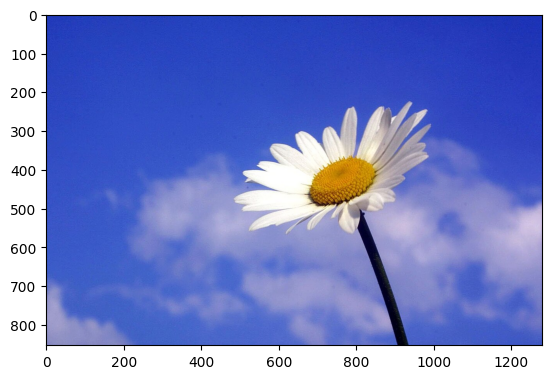

In [77]:
plt.imshow(image)

In [78]:
image.shape

(853, 1280, 3)

In [79]:
X = image.reshape(-1, 3)
X.shape

(1091840, 3)

`image.shape` = renvoit un output (853,1280, 3) pour l'image de fleur. Cela signifie que l'image a 853 lignes (hauteur), 1280 colonnes (largeur) et 3 canaux de couleur. Donc c'est une image couleur de 853 x 1280. Chaque pixel a trois valeurs (R, G, B)

`image.reshape(-1, 3)` = on "aplatit" l'image en un tableau 2D où chaque ligne représente un pixel et où chaque colonne représente une composant de couleur (R, G, B). Le paramètre -1 signifie que Python calcule automatiquement ce nombre en fonction des dimensions restants

On obtient donc (853 x 1280, 3) = (1091840, 3). 
Ce tableau signifie qu'on a 1091840 pixels, et chaque pixels est représenté par 3 nombres (la couleur R, G, B). 

Cette transformation est nécéssaire pour appliquer l'algorithme K-Means, car il s'attend à recevoir un tableau de données tabulaires. 

In [80]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [81]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

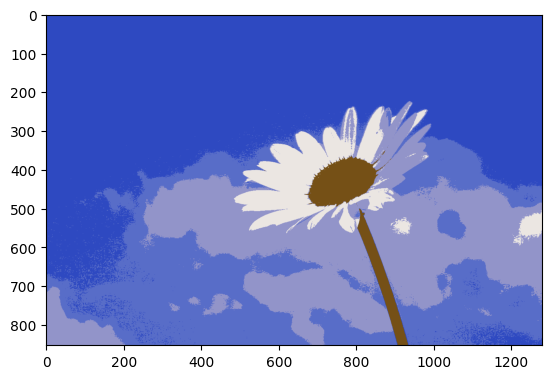

In [82]:
plt.imshow(segmented_img / 255)

In [83]:
cv2.imwrite("image1.png", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite("image2.png", cv2.cvtColor(segmented_img.astype("uint8"), cv2.COLOR_BGR2RGB))

True